In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow
!pip install wordcloud
!pip install pycountry
!pip install langdetect
!pip install prettytable

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import itertools
from itertools import combinations
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from collections import Counter
import nltk
from nltk.corpus import stopwords, words as nltk_words
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.cm as cm
import re
from nltk.stem import WordNetLemmatizer
import heapq
from tqdm import tqdm
import pycountry
from langdetect import detect
from prettytable import PrettyTable
import random

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# LOAD DATA FILES AND COMBINE

In [ ]:
# shihab
# df = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-1.csv')
# df1 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-2.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-3.csv')
# df3 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-4.csv')
# df4 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-5.csv')
# df5 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets-6.csv')
# df6 = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/#bitcoin data 3 lakh 50k approx/tweets.csv')

# raiyan
df = pd.read_csv('/content/drive/MyDrive/data/tweets.csv')
df1 = pd.read_csv('/content/drive/MyDrive/data/tweets-1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/data/tweets-2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/data/tweets-3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/data/tweets-4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/data/tweets-5.csv')
df6 = pd.read_csv('/content/drive/MyDrive/data/tweets-6.csv')

comb = [df, df1, df2, df3, df4, df5, df6]
df = pd.concat(comb)
print(df.shape)

<ipython-input-28-ad68de40a080>:13: DtypeWarning:

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-28-ad68de40a080>:17: DtypeWarning:

Columns (6,7,16) have mixed types. Specify dtype option on import or set low_memory=False.



(337702, 19)


In [ ]:
df.head()

,Tweet Id,Tweet URL,Tweet Posted Time,Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,User Id,Name,Username,User Bio,Verified or Non-Verified,Profile URL,User Followers,User Following,User Account Creation Date
0,"""1570926731019825152""",https://twitter.com/_MKKX_7/status/15709267310...,17 Sep 2022 00:04:53,"""أدعم التغريدات وفضّلها وأنشرها🙏🏻\n\n🚨سلسلة |#...",ReTweet,"""Twitter for Android""",0,0,"""""",Arabic,"""1138927555946471424""","""ندى الورد 🇸🇦💚""",_MKKX_7,"""إن تحققت أمانينا فالحمد لله و إن تأخرت فهي حت...",Non-Verified,https://twitter.com/_MKKX_7,169.0,4999.0,12-Jun-2019 21:54:24
1,"""1570926731183423488""",https://twitter.com/hungblct/status/1570926731...,17 Sep 2022 00:04:53,"""💧 Unidef Airdrop 💧\n\n🏆 Task: ➕ $9 ...",ReTweet,"""Twitter for Android""",0,0,"""""",English,"""1381649113943482370""","""Nguyễn Hưng""",hungblct,"""Thánh 😇""",Non-Verified,https://twitter.com/hungblct,38.0,3354.0,12-Apr-2021 16:43:22
2,"""1570926713571520513""",https://twitter.com/plusendless/status/1570926...,17 Sep 2022 00:04:49,"""Etheruem has officially merged and moved towa...",ReTweet,"""Twitter for Android""",0,0,"""""",English,"""1381898326728175616""","""Mischa Markus""",plusendless,"""#Bitcoin value = ∞\nsupply limited to 21 mill...",Non-Verified,https://twitter.com/plusendless,128.0,432.0,13-Apr-2021 09:13:54
3,"""1570926715228295175""",https://twitter.com/bengali_tech/status/157092...,17 Sep 2022 00:04:49,"""New airdrop: Kingdomverse (USDT)\nTotal Rewar...",ReTweet,"""Twitter for Android""",0,0,"""""",English,"""1230524903918575617""","""𝗠𝗔 𝗢𝗳𝗳𝗶𝗰𝗶𝗮𝗹 𝗘𝗮𝗿𝗻𝗶𝗻𝗴""",bengali_tech,"""I am youtuber.Please visit my channel..My cha...",Non-Verified,https://twitter.com/bengali_tech,37.0,2817.0,20-Feb-2020 16:09:46
4,"""1570926708165050370""",https://twitter.com/Maheshishere4/status/15709...,17 Sep 2022 00:04:48,"""Bitcoin price just went down by $23! Current ...",Tweet,"""Nft Data Bot""",0,1,"""""",English,"""1557406769957449728""","""nft mahesh""",Maheshishere4,"""Crypto & NFT Degen • #NFT Marketing / Advisor...",Non-Verified,https://twitter.com/Maheshishere4,308.0,749.0,10-Aug-2022 16:41:45


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming your DataFrame is already loaded as df
# df = pd.read_csv('your_dataset.csv')

# Function to truncate text to a specified number of words
def truncate_text(text, num_words=10):
    words = text.split()
    if len(words) > num_words:
        return ' '.join(words[:num_words]) + '...'
    else:
        return text

# Number of words to display per cell
num_words_per_cell = 10

# Select the 3 specific rows you want to display
selected_rows = [0, 2, 4]  # Replace with the desired row indices

# Create a DataFrame with the column names and the selected rows of sample data
sample_data = {col: [truncate_text(str(df[col].iloc[i]), num_words=num_words_per_cell) for i in selected_rows] for col in df.columns}
sample_data_df = pd.DataFrame(sample_data)

# Prepare the header and cell values for the plotly table
header_values = list(sample_data_df.columns)
cell_values = [sample_data_df[col].tolist() for col in sample_data_df.columns]

# Create the table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=header_values,
                fill_color='paleturquoise',
                align='left',
                font=dict(size=12)),
    cells=dict(values=cell_values,
               fill_color='lavender',
               align='left',
               font=dict(size=10))
)])

# Add title to the plot
fig.update_layout(title='Dataset structure', title_x=0.5)

# Show plot
fig.show()

# PREPROCESSING

In [ ]:
# Convert 'Tweet Content' column to lowercase
df['Tweet Content'] = df['Tweet Content'].str.lower()

# Remove URLs from text
def remove_urls(text):
    return re.sub(r'http\S+', '', text)
df['Tweet Content'] = df['Tweet Content'].apply(remove_urls)

#remove other language tweets
df = df.loc[df['Tweet Language']=="English"]
print(df.shape)

# remove data with NaN values in these columns and convert followers and following column to integers

df.dropna(subset=['User Followers', 'User Following', "Retweets Received"], inplace=True)

df['User Followers'] = df['User Followers'].astype(int)
df['User Following'] = df['User Following'].astype(int)
df['Retweets Received'] = df['Retweets Received'].astype(int)

#formatting date time (DD-MM-YY)(HH-MM-SS)

df['datetime'] = pd.to_datetime(df['Tweet Posted Time'], format='%d %b %Y %H:%M:%S')
df['date'] = df['datetime'].dt.date
print(df['date'].unique())




(253535, 19)
[datetime.date(2022, 9, 17) datetime.date(2022, 9, 16)
 datetime.date(2022, 9, 15)]


In [ ]:
# creating a colum containing country data

empty_location_count = (df['Tweet Location'] == '""').sum()

non_empty_location_count = (df['Tweet Location'] != '""').sum()

print("Total number of rows with empty 'Tweet Location' value:", empty_location_count)
print("Total number of rows without empty 'Tweet Location' value:", non_empty_location_count)

# replace empty location values with NaN
df['Tweet Location'] = df['Tweet Location'].replace('""', pd.NA)

countries = [country.name for country in pycountry.countries]

# Function to extract country from location
def extract_country(location):
    if pd.isnull(location):
        return None
    # Remove double quotes from the location string
    location_without_quotes = re.sub('"', '', location)
    # Split the location string by commas
    part = location_without_quotes.split(', ')[-1]
    parts = part.split()
    for i in range(len(parts)):
        temp = " ".join(parts[i+1:])
        if temp in countries:
            return temp

    return None

# Reset indices to ensure uniqueness
df.reset_index(drop=True, inplace=True)

# Apply the function to extract country from each location
df['Country'] = df['Tweet Location'].apply(extract_country)

# Creating a column containing just the hashtags

pattern = r'#\w+'
# Extract hashtags from each tweet and store them in a new column
df['Hashtags'] = df['Tweet Content'].apply(lambda x: re.findall(pattern, x))

Total number of rows with empty 'Tweet Location' value: 253146
Total number of rows without empty 'Tweet Location' value: 370


In [ ]:
# removing stopwords

# Set of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from tweet content
def remove_stopwords(tweet):
    # Split the tweet content by spaces while preserving hashtags
    tokens = tweet.split()
    # Remove stopwords except for hashtags
    filtered_tokens = []
    for token in tokens:
        if token.startswith('#'):  # Preserve hashtags without removing stopwords
            filtered_tokens.append(token)
        elif token.lower() not in stop_words:  # Remove stopwords for other words
            filtered_tokens.append(token)
    # Join the tokens back into a string
    return ' '.join(filtered_tokens)

# Apply the function to the "Tweet Content" column
df['Tweet Content'] = df['Tweet Content'].apply(remove_stopwords)



In [ ]:
import pandas as pd

# Assuming your DataFrame is already loaded as df
# df = pd.read_csv('your_dataset.csv')

# Convert the 'Tweet Posted Time' column to datetime if it is not already in datetime format
df['Tweet Posted Time'] = pd.to_datetime(df['Tweet Posted Time'])

# Extract the date part from the 'Tweet Posted Time' column
df['Tweet Date'] = df['Tweet Posted Time'].dt.date

# Get all unique dates
unique_dates = df['Tweet Date'].unique()

# Print the unique dates
for date in unique_dates:
    print(date)


2022-09-17
2022-09-16
2022-09-15


In [ ]:
import pandas as pd

# Drop multiple columns
df = df.drop(['Tweet URL', 'Tweet Location', 'Tweet Language','Name','Profile URL','date','Tweet Date'], axis=1)

In [ ]:
# Hashtag Lemmatization and keeping just the first instance of the hashtag

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize hashtags in tweet content
def lemmatize_hashtags(tweet):
    # Define regular expression pattern to find hashtags
    hashtag_pattern = r'#(\w+)'
    # Find all hashtags in the tweet content
    hashtags = re.findall(hashtag_pattern, tweet)
    # Iterate over hashtags
    for hashtag in hashtags:
        # Lemmatize the word
        lemmatized_hashtag = lemmatizer.lemmatize(hashtag, pos='a')
        # Replace the hashtag with lemmatized word
        tweet = tweet.replace(f'#{hashtag}', f'#{lemmatized_hashtag}')
    return tweet

# Apply the function to the "Tweet Content" column
df['Tweet Content'] = df['Tweet Content'].apply(lemmatize_hashtags)



In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming your DataFrame is already loaded as df
# df = pd.read_csv('your_dataset.csv')

# Function to truncate text to a specified number of words
def truncate_text(text, num_words=10):
    words = text.split()
    if len(words) > num_words:
        return ' '.join(words[:num_words]) + '...'
    else:
        return text

# Number of words to display per cell
num_words_per_cell = 10

# Select the 3 specific rows you want to display
selected_rows = [0, 2, 4]  # Replace with the desired row indices

# Create a DataFrame with the column names and the selected rows of sample data
sample_data = {col: [truncate_text(str(df[col].iloc[i]), num_words=num_words_per_cell) for i in selected_rows] for col in df.columns}
sample_data_df = pd.DataFrame(sample_data)

# Prepare the header and cell values for the plotly table
header_values = list(sample_data_df.columns)
cell_values = [sample_data_df[col].tolist() for col in sample_data_df.columns]

# Create the table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=header_values,
                fill_color='paleturquoise',
                align='left',
                font=dict(size=12)),
    cells=dict(values=cell_values,
               fill_color='lavender',
               align='left',
               font=dict(size=10))
)])

# Add title to the plot
fig.update_layout(title='Dataset structure after preprocessing', title_x=0.5)

# Show plot
fig.show()

In [ ]:
print(df.columns)
df_nodup = df

Index(['Tweet Id', 'Tweet Posted Time', 'Tweet Content', 'Tweet Type',
       'Client', 'Retweets Received', 'Likes Received', 'User  Id', 'Username',
       'User Bio', 'Verified or Non-Verified', 'User Followers',
       'User Following', 'User Account Creation Date', 'datetime', 'Country',
       'Hashtags'],
      dtype='object')


# **Analyze**


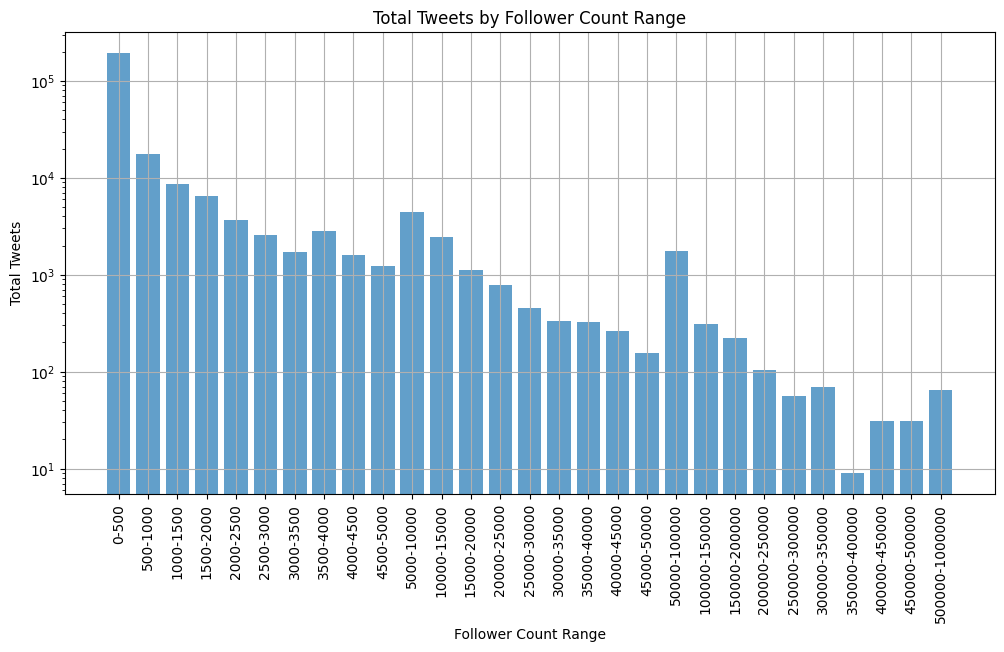

In [ ]:
# Define the ranges for user followers
follower_ranges = [(0, 500), (500, 1000), (1000, 1500), (1500, 2000),
                   (2000, 2500), (2500, 3000), (3000, 3500), (3500, 4000),
                   (4000, 4500), (4500, 5000), (5000, 10000), (10000, 15000),
                   (15000, 20000), (20000, 25000), (25000, 30000), (30000, 35000),
                   (35000, 40000), (40000, 45000), (45000, 50000), (50000, 100000),
                   (100000, 150000), (150000, 200000), (200000, 250000), (250000, 300000),
                   (300000, 350000), (350000, 400000), (400000, 450000), (450000, 500000),
                   (500000, 1000000)]

# Group the data based on follower ranges and calculate total tweet count
tweets_count_by_range = []
for start, end in follower_ranges:
    filtered_df = df[(df['User Followers'] >= start) & (df['User Followers'] < end)]
    total_tweets_count = filtered_df.shape[0]
    tweets_count_by_range.append(total_tweets_count)

# Plot the data on a bar graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(follower_ranges)), tweets_count_by_range, align='center', alpha=0.7)
plt.xticks(range(len(follower_ranges)), [f'{start}-{end}' for start, end in follower_ranges], rotation=90)
plt.xlabel('Follower Count Range')
plt.ylabel('Total Tweets')
plt.yscale('log')  # Convert y-axis to logarithmic scale
plt.title('Total Tweets by Follower Count Range')
plt.grid(True)
plt.show()

**TOP 35 Hashtags and their occurance count**

In [ ]:
# Extract hashtags, also lemmatized to remove plurals

lemmatizer = WordNetLemmatizer()

def lemmatize_hashtag(hashtag):
    return lemmatizer.lemmatize(hashtag)

# Extract hashtags and lemmatize each hashtag
hashtags = df_nodup['Tweet Content'].str.extractall(r'#(\w+)')[0].apply(lemmatize_hashtag)

# Count the occurrences of each lemmatized hashtag
word_counts = hashtags.value_counts()

# Output the counts
print(word_counts)

0
bitcoin           240980
crypto             66164
airdrop            61920
cryptocurrency     39473
btc                39071
                   ...  
zzp                    1
psychonauts            1
psychedelicart         1
754325                 1
acrohash               1
Name: count, Length: 15221, dtype: int64


<ipython-input-41-6014dc5dee18>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




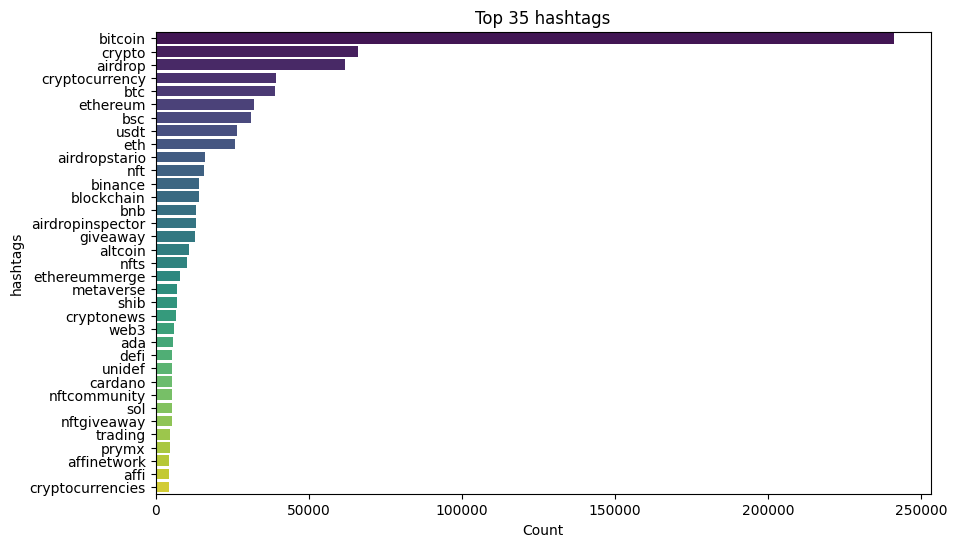

In [ ]:
#top 35 hashtags plot (X- count, Y-hashtags)
top_n = 35

# Filter the top N hashtags
top_word_counts = word_counts.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_word_counts.values, y=top_word_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('hashtags')
plt.title(f'Top {top_n} hashtags')
plt.show()

**Top 10 hashtag and frequency count**

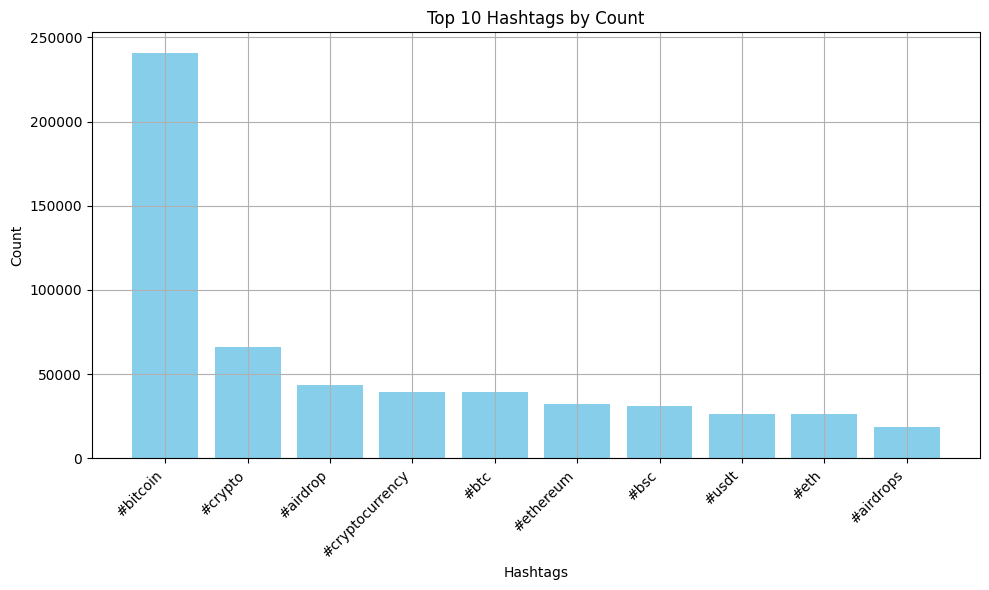

In [ ]:
# Split the hashtags from the tweet content and create a new DataFrame
hashtags_df = df['Tweet Content'].str.extractall(r'(#\w+)')[0].value_counts().reset_index()
hashtags_df.columns = ['Hashtag', 'Count']

# Select the top 10 hashtags
top_10_hashtags = hashtags_df.head(10)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_hashtags['Hashtag'], top_10_hashtags['Count'], color='skyblue')

# Add labels and title
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 Hashtags by Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


**Occurance together-co-occurrences**

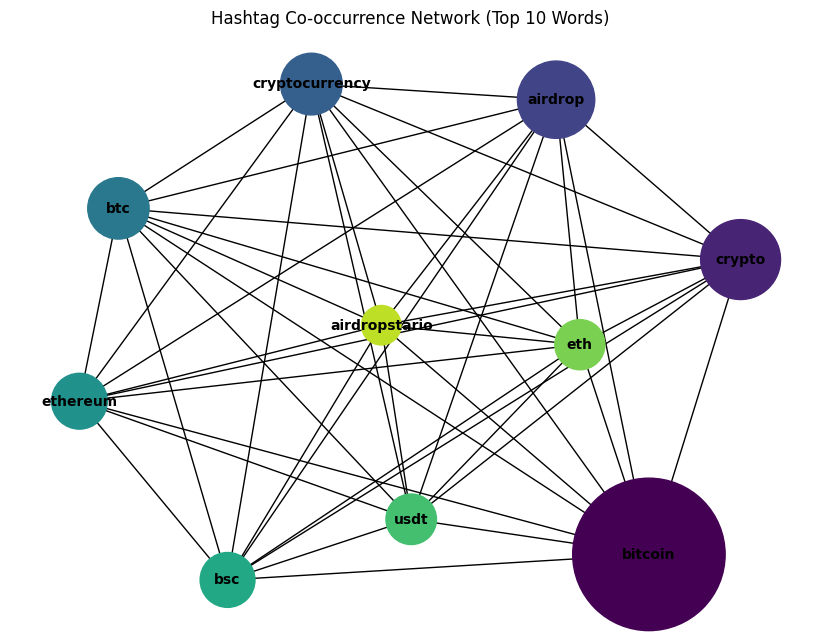

In [ ]:
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Top 10 words (to prevent clutter)
top_words = dict(sorted_words[:10])

word_combinations = list(itertools.combinations(top_words.keys(), 2))
G = nx.Graph()

# Add nodes with counts
for word, count in top_words.items():
    G.add_node(word, count=count)

# Add edges with co-occurrence weights
for word1, word2 in word_combinations:
    if word1 in top_words and word2 in top_words:
        co_occurrence = min(top_words[word1], top_words[word2])  # Example of co-occurrence measure
        G.add_edge(word1, word2, weight=co_occurrence)

# Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Node sizes based on word count
node_sizes = [top_words[word] * 0.05 for word in G.nodes]

# Color mapping for nodes
colors = cm.viridis([i / len(G.nodes) for i in range(len(G.nodes))])

# Increase figure size
plt.figure(figsize=(8, 6))  # Change the size as needed (width, height)

# Draw the graph with labels and custom node sizes/colors
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=colors, font_size=10, font_weight='bold')

# Set plot title and show the plot
plt.title('Hashtag Co-occurrence Network (Top 10 Words)')
plt.show()


**Co-occurance Table**

In [ ]:
# creating a table to actually show the number of co-occurrences

co_occurrence_data = []

for word1, word2 in word_combinations:
    if word1 in top_words and word2 in top_words:
        co_occurrence = min(top_words[word1], top_words[word2])
        co_occurrence_data.append({'Word 1': word1, 'Word 2': word2, 'Co-occurrences': co_occurrence})


co_occurrence_table = pd.DataFrame(co_occurrence_data)

print("Co-occurrence Table:")
co_occurrence_table.head(10)

Co-occurrence Table:


,Word 1,Word 2,Co-occurrences
0,bitcoin,crypto,66164
1,bitcoin,airdrop,61920
2,bitcoin,cryptocurrency,39473
3,bitcoin,btc,39071
4,bitcoin,ethereum,32296
5,bitcoin,bsc,31192
6,bitcoin,usdt,26468
7,bitcoin,eth,26069
8,bitcoin,airdropstario,16167
9,crypto,airdrop,61920


# **Finding the most used words alongside the top 20 most popular hashtags**

In [ ]:
# Load English words set
english_words = set(nltk_words.words())

# Function to extract hashtags and non-hashtag words from a tweet
def extract_hashtags_and_non_hashtag_words(tweet):
    # Find all occurrences of hashtags followed by non-hashtag words
    matches = re.findall(r'#(\w+)(?:\s+(\w+))?', tweet)
    # Extract non-hashtag words from each match
    non_hashtag_words = [match[1] for match in matches if match[1] and match[1].isalpha() and match[1].lower() in english_words]
    return non_hashtag_words

# Function to remove stopwords
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]

# Extract non-hashtag words for each tweet and remove stopwords
non_hashtag_words = df_nodup['Tweet Content'].apply(extract_hashtags_and_non_hashtag_words)

# Remove stopwords and filter non-English words from non-hashtag words
non_hashtag_words_no_stopwords = non_hashtag_words.apply(lambda words: remove_stopwords(words))

# Count occurrences of non-hashtag words for each hashtag
hashtags_and_words = {}
for hashtags, words in zip(df_nodup['Tweet Content'].str.findall(r'#(\w+)'), non_hashtag_words_no_stopwords):
    for hashtag in hashtags:
        if hashtag not in hashtags_and_words:
            hashtags_and_words[hashtag] = []
        hashtags_and_words[hashtag].extend(words)

# Get top 20 hashtags
top_20_hashtags = df_nodup['Tweet Content'].str.findall(r'#(\w+)').explode().value_counts().head(20).index

# Get top 5 non-hashtag words for each of the top 20 hashtags
top_5_non_hashtag_words = {}
for hashtag in top_20_hashtags:
    words = hashtags_and_words.get(hashtag, [])
    top_5_non_hashtag_words[hashtag] = [word for word, _ in Counter(words).most_common(5)]

# Print dictionary where keys are top 20 hashtags and values are lists of top 5 non-hashtag words
print("Dictionary with keys as top 20 hashtags and values as lists of top 5 non-hashtag words:")
print(top_5_non_hashtag_words)

Dictionary with keys as top 20 hashtags and values as lists of top 5 non-hashtag words:
{'bitcoin': ['price', 'mining', 'one', 'last', 'follow'], 'crypto': ['price', 'follow', 'telegram', 'last', 'world'], 'airdrop': ['project', 'please', 'x', 'forget', 'giveaway'], 'cryptocurrency': ['price', 'follow', 'earn', 'given', 'user'], 'btc': ['last', 'price', 'follow', 'future', 'world'], 'ethereum': ['price', 'follow', 'last', 'earn', 'merge'], 'bsc': ['grow', 'project', 'season', 'please', 'gift'], 'usdt': ['filled', 'buy', 'average', 'giveaway', 'current'], 'eth': ['last', 'price', 'follow', 'future', 'world'], 'airdrops': ['prize', 'source', 'discord', 'wallet', 'every'], 'airdropstario': ['one', 'extraordinary', 'thank', 'project', 'good'], 'nft': ['conversation', 'project', 'earn', 'average', 'get'], 'binance': ['earn', 'average', 'community', 'technical', 'project'], 'blockchain': ['last', 'giving', 'conversation', 'designed', 'sale'], 'bnb': ['price', 'follow', 'world', 'future', 'li

**Number of rows with User Followers greater than 10000: 8628**

In [ ]:
df_nodup['User Followers'] = pd.to_numeric(df_nodup['User Followers'], errors='coerce')

threshold = 10000
high_followers_rows = df_nodup[df_nodup['User Followers'] > threshold]

print(f"Number of rows with User Followers greater than {threshold}: {len(high_followers_rows)}")
# print(high_followers_rows.head())

Number of rows with User Followers greater than 10000: 8628


**Hourly usage rate of The bitcoin tweet**

In [ ]:
top_word = word_counts.head(3)
tweets = df_nodup[df_nodup['Tweet Content'].str.contains('#bitcoin')]

In [ ]:
df_sorted = tweets.sort_values(by='datetime')
hourly_grouped = df_sorted.groupby(pd.Grouper(key='datetime', freq='H'))
for key, group in hourly_grouped:
    print(key)
    print(group)
    break

2022-09-15 09:00:00
                     Tweet Id  \
253515  "1570339739223588864"   
253512  "1570339741970866176"   
253514  "1570339741412855815"   
253513  "1570339741475667968"   
253511  "1570339744894324736"   
...                       ...   
247639  "1570351713382715393"   
247638  "1570351711642091520"   
247634  "1570351716238860288"   
247635  "1570351716440342528"   
247633  "1570351714376597504"   

                                                Tweet URL  \
253515  https://twitter.com/NezhadElikaie/status/15703...   
253512  https://twitter.com/lovebigwinner/status/15703...   
253514  https://twitter.com/rizzyreiz/status/157033974...   
253513  https://twitter.com/MiningDisrupt/status/15703...   
253511  https://twitter.com/JohnYan19434715/status/157...   
...                                                   ...   
247639  https://twitter.com/IsniIlham/status/157035171...   
247638  https://twitter.com/thespacekill/status/157035...   
247634  https://twitter.com/Philli

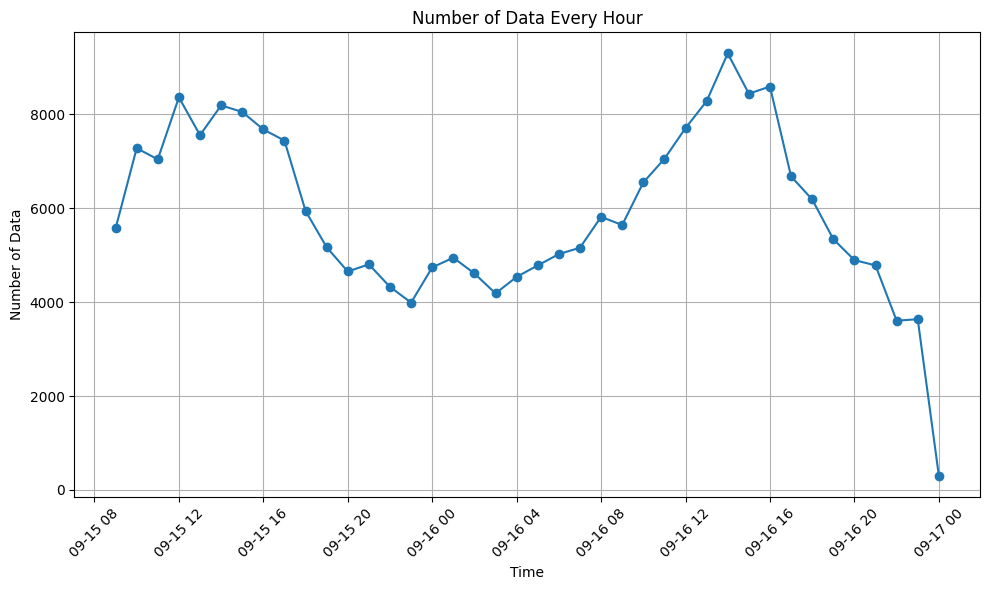

In [ ]:
count_per_interval = hourly_grouped.size()
# Extract x-axis (time intervals) and y-axis (counts)
x = count_per_interval.index
y = count_per_interval.values

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Number of Data')
plt.title('Number of Data Every Hour')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#number of tweets using bitcoin every hour

**Day and night cycles of tweets**

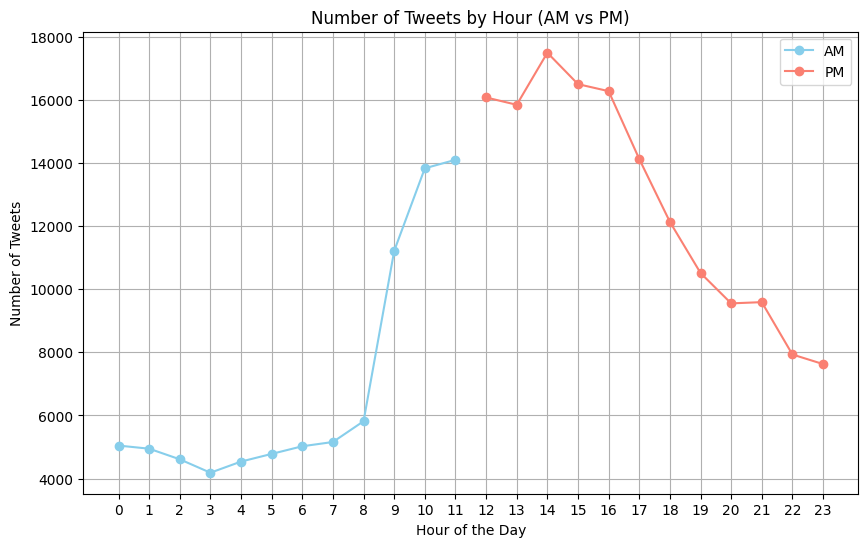

In [ ]:
# Extract hour from datetime
df_sorted['hour'] = df_sorted['datetime'].dt.hour

# Group tweets by hour and count number of tweets for each hour during AM and PM periods
am_tweet_counts = df_sorted[df_sorted['hour'] < 12]['hour'].value_counts().sort_index()
pm_tweet_counts = df_sorted[df_sorted['hour'] >= 12]['hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot for AM tweets
plt.plot(am_tweet_counts.index, am_tweet_counts.values, marker='o', linestyle='-', color='skyblue', label='AM')

# Plot for PM tweets
plt.plot(pm_tweet_counts.index, pm_tweet_counts.values, marker='o', linestyle='-', color='salmon', label='PM')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Hour (AM vs PM)')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Ensure x-axis ticks cover all hours
plt.show()

**Relating the locations of tweets to their usage**

In [ ]:
# checking all available locations in tweets
unique_locations = df_nodup['Tweet Location'].dropna().unique()

# module to relate df locations to actual locations
countries = [country.name for country in pycountry.countries]
# print(countries)

# print(unique_locations)

In [ ]:
def extract_country(location):
    if pd.isnull(location):
        return None
    # Remove double quotes from the location string
    location_without_quotes = re.sub('"', '', location)

    part = location_without_quotes.split(', ')[-1]
    parts = part.split()
    for i in range(len(parts)):
        temp = " ".join(parts[i+1:])
        if temp in countries:
            return temp

    return None

# Reset indices to ensure uniqueness
df_nodup.reset_index(drop=True, inplace=True)

df_nodup['Country'] = df_nodup['Tweet Location'].apply(extract_country)

#print(df_nodup)

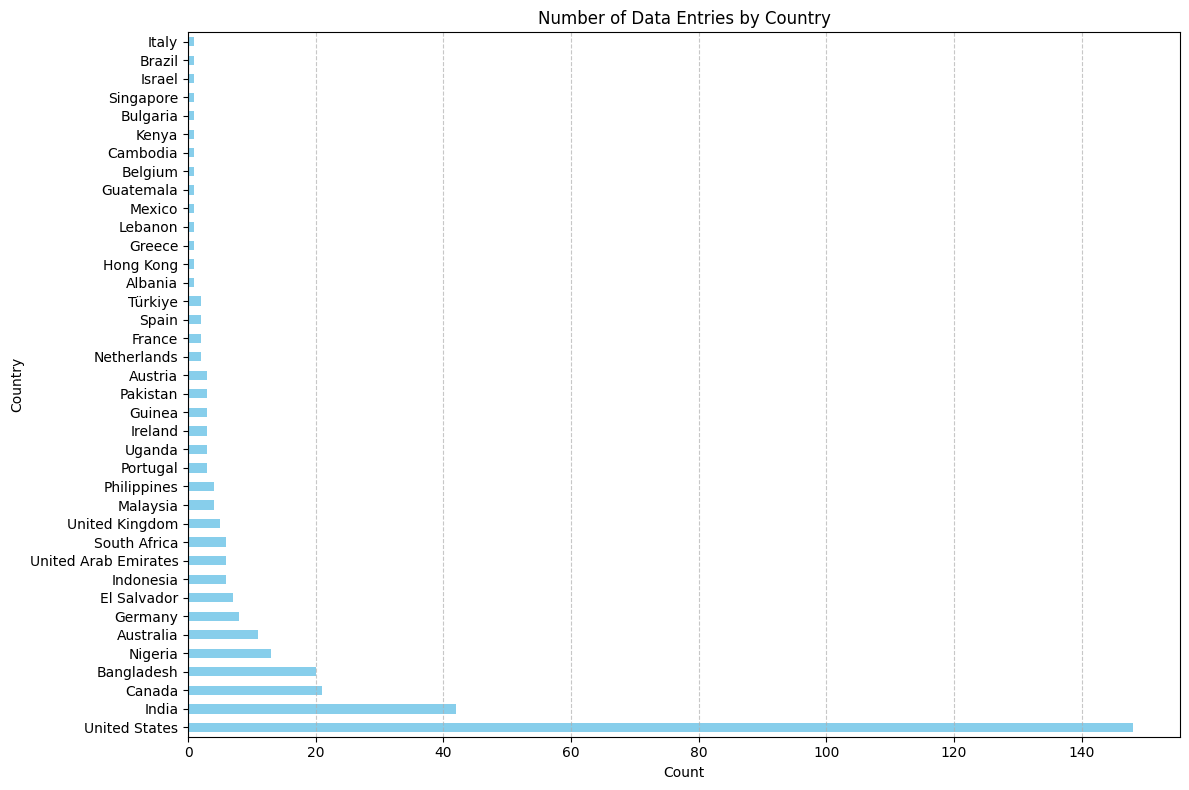

In [ ]:
# Group by "Country" and count occurrences
country_counts = df_nodup["Country"].value_counts()

# Plotting
plt.figure(figsize=(12, 8))
country_counts.plot(kind='barh', color='skyblue')
plt.title('Number of Data Entries by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Tweet day and night cycles by country**

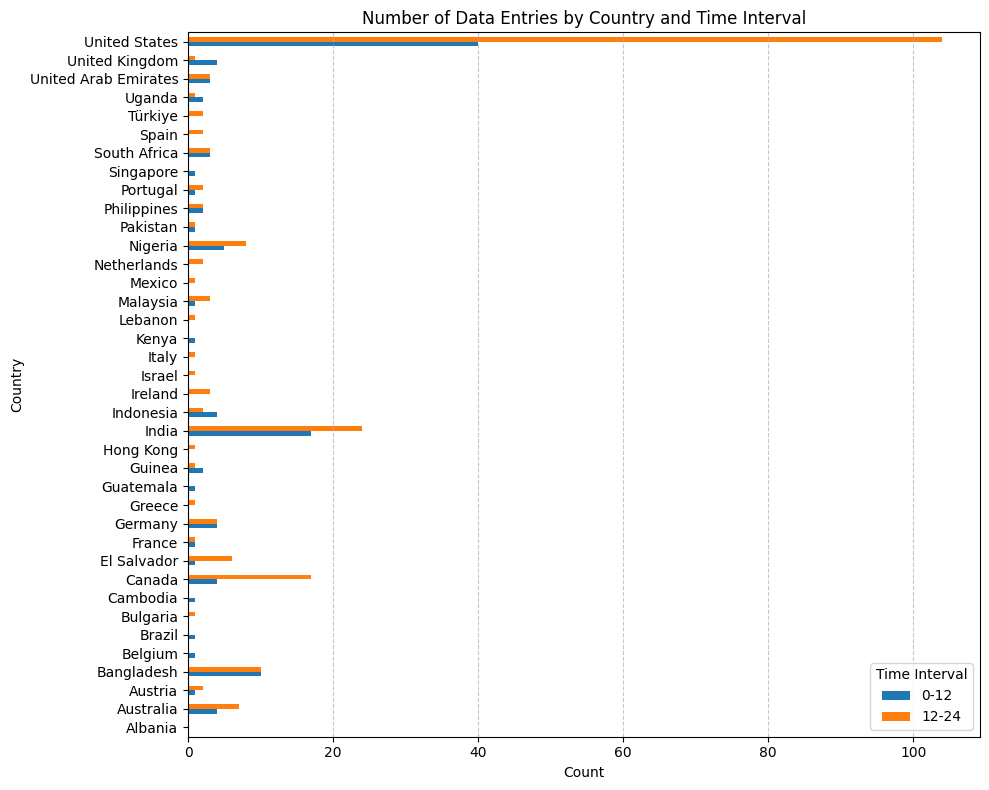

In [ ]:
# Create two new columns for time intervals (0 to 12 and 12 to 24)
df_nodup['time_interval'] = pd.cut(df_nodup['datetime'].dt.hour, bins=[0, 12, 24], labels=['0-12', '12-24'])

# Group by 'Country' and 'time_interval' and count occurrences
grouped_data = df_nodup.groupby(['Country', 'time_interval']).size().unstack(fill_value=0)

# Plotting
grouped_data.plot(kind='barh', figsize=(10, 8))
plt.title('Number of Data Entries by Country and Time Interval')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Time Interval')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Tweet count Vs tweet content length**

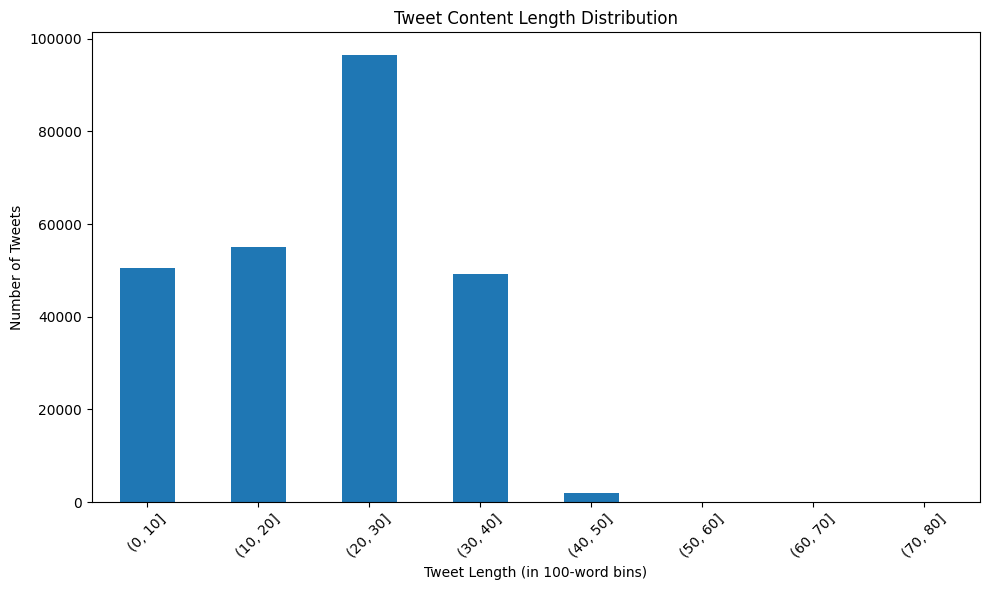

In [ ]:
# tweet content length

df_nodup['Tweet Length'] = df_nodup['Tweet Content'].apply(lambda x: len(x.split()))

df_grouped = df_nodup.groupby(pd.cut(df_nodup['Tweet Length'], bins=range(0, max(df_nodup['Tweet Length'])+10, 10))).size()

plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar')
plt.title('Tweet Content Length Distribution')
plt.xlabel('Tweet Length (in 100-word bins)')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Most common words in Tweet content aside from stop words **

In [ ]:
# removing stop words and showing most common words used in tweets

def preprocess_text(text):
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove symbols and emojis
    text = re.sub(r'[^A-Za-z\s]+', '', text)
    # Remove non-printable characters
    text = ''.join([char for char in text if char.isprintable()])
    return text

combined_text = ' '.join(df_nodup['Tweet Content'])

cleaned_text = preprocess_text(combined_text)

# Tokenize
words = nltk.word_tokenize(cleaned_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Count word frequencies
word_counts_filtered = Counter(filtered_words)

**Word cloud- most common words**

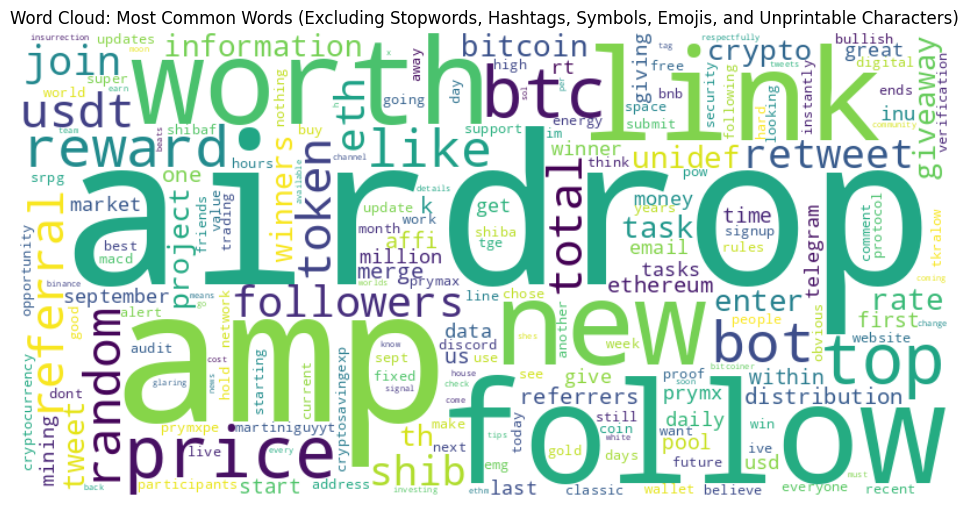

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_filtered)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Most Common Words (Excluding Stopwords, Hashtags, Symbols, Emojis, and Unprintable Characters)')
plt.show()

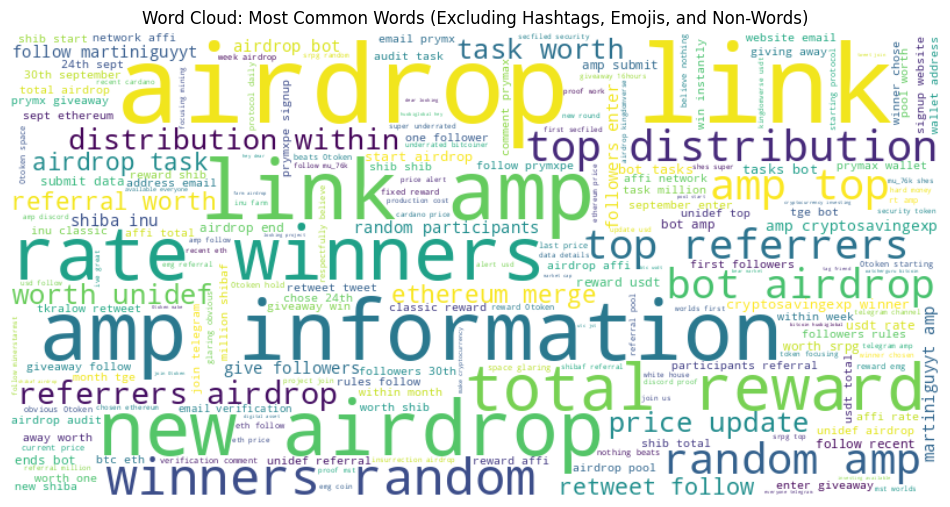

In [ ]:
tweet_content = df['Tweet Content']

# Extract words excluding hashtags and convert to lowercase
words_excluding_hashtags = [word.lower() for content in tweet_content for word in content.split() if not word.startswith('#')]


pattern = re.compile(r'[^\w\s]+')

# Remove emojis, articles, and other non-word characters
words_excluding_nonwords = [pattern.sub('', word) for word in words_excluding_hashtags]

# Filter out empty strings
words_excluding_nonwords = [word for word in words_excluding_nonwords if word]

# Create a string of all content
text = ' '.join(words_excluding_nonwords)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Most Common Words (Excluding Hashtags, Emojis, and Non-Words)')
plt.show()


# **Average followers of users VS hastag**
**Average number of followers for users who have used the x axis hashtags. so if 5 people used #bitcoin and their total follower count is 30. the avg followe will be 30/5=6**

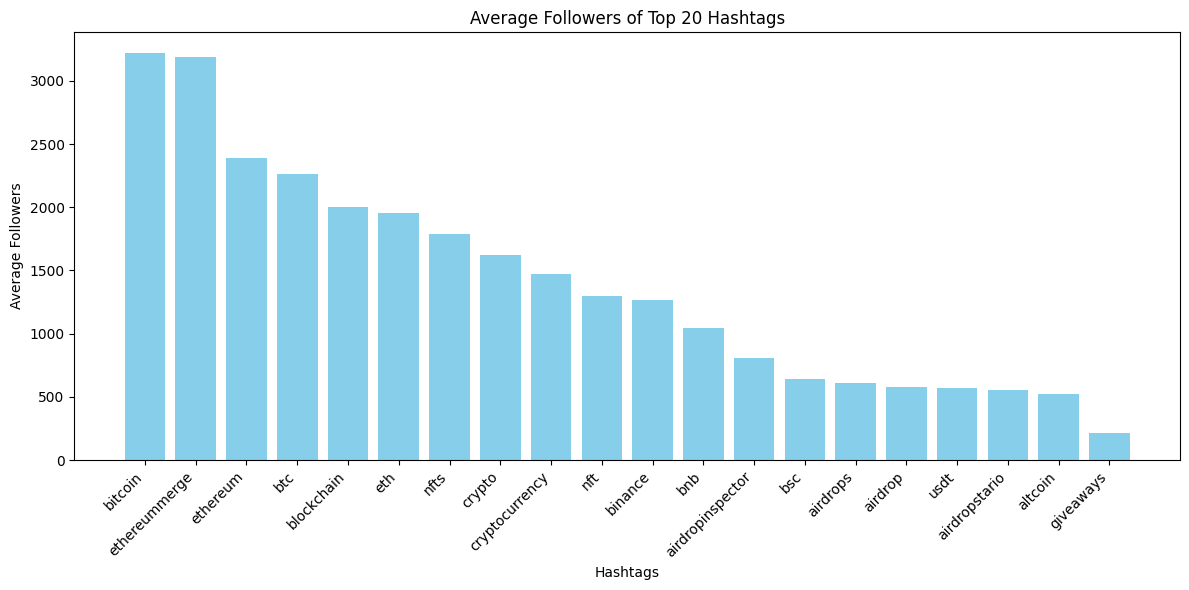

In [ ]:
hashtags = df_nodup['Tweet Content'].str.extractall(r'#(\w+)')[0]

hashtag_counts = hashtags.value_counts()

top_20_hashtags = hashtag_counts.head(20)

hashtags_followers = {}

for hashtag in top_20_hashtags.index:
    hashtag_tweets = df_nodup[df_nodup['Tweet Content'].str.contains(fr'#\b{hashtag}\b', case=False)]
    avg_followers = hashtag_tweets['User Followers'].mean()
    hashtags_followers[hashtag] = avg_followers


# Convert the dictionary of hashtags and average followers to a DataFrame
df_avg_followers = pd.DataFrame.from_dict(hashtags_followers, orient='index', columns=['Average Followers'])

df_avg_followers = df_avg_followers.sort_values(by='Average Followers', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(df_avg_followers.index, df_avg_followers['Average Followers'], color='skyblue')
plt.xlabel('Hashtags')
plt.ylabel('Average Followers')
plt.title('Average Followers of Top 20 Hashtags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# tweet Likes sum Vs hashtag
**total number of likes received for tweets containing the top 20 hashtags.**

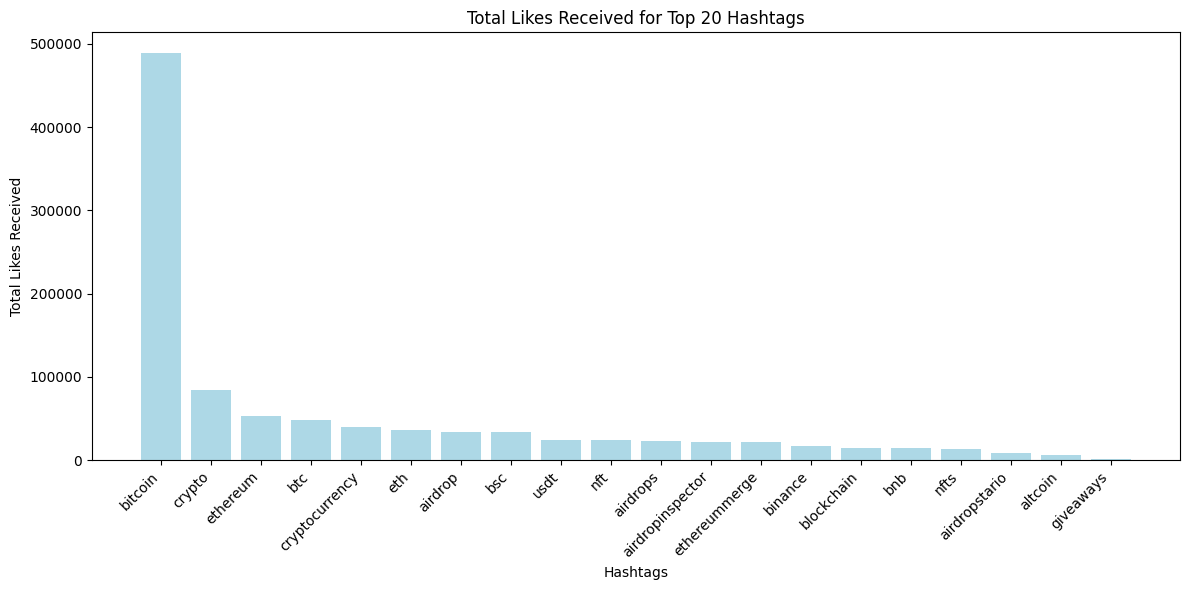

In [ ]:
hashtags_likes = {}

for hashtag in top_20_hashtags.index:
    hashtag_tweets = df_nodup[df_nodup['Tweet Content'].str.contains(fr'#\b{hashtag}\b', case=False)]
    hashtag_tweets.loc[:, 'Likes Received'] = pd.to_numeric(hashtag_tweets['Likes Received'], errors='coerce')
    total_likes = hashtag_tweets['Likes Received'].sum()
    hashtags_likes[hashtag] = total_likes

# Convert the dictionary of hashtags and total likes to a DataFrame
df_total_likes = pd.DataFrame.from_dict(hashtags_likes, orient='index', columns=['Total Likes'])

df_total_likes = df_total_likes.sort_values(by='Total Likes', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(df_total_likes.index, df_total_likes['Total Likes'], color='lightblue')
plt.xlabel('Hashtags')
plt.ylabel('Total Likes Received')
plt.title('Total Likes Received for Top 20 Hashtags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# retweet  sum Vs hashtag
**total number of retweets for tweets containing the top 20 hashtags.**

<ipython-input-87-64c05dc9d0b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hashtag_tweets['Retweets Received'] = pd.to_numeric(hashtag_tweets['Retweets Received'], errors='coerce')


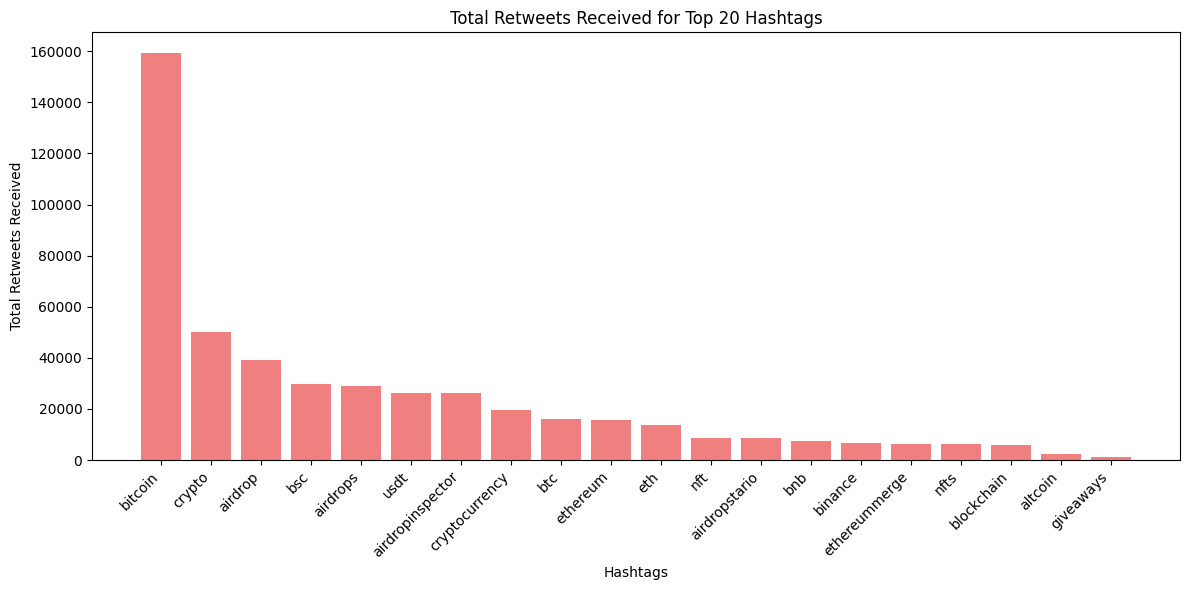

In [ ]:
hashtags_retweets = {}

for hashtag in top_20_hashtags.index:
    hashtag_tweets = df_nodup[df_nodup['Tweet Content'].str.contains(fr'#\b{hashtag}\b', case=False)]
    hashtag_tweets['Retweets Received'] = pd.to_numeric(hashtag_tweets['Retweets Received'], errors='coerce')
    total_retweets = hashtag_tweets['Retweets Received'].sum()
    hashtags_retweets[hashtag] = total_retweets

# Convert the dictionary of hashtags and total retweets to a DataFrame
df_total_retweets = pd.DataFrame.from_dict(hashtags_retweets, orient='index', columns=['Total Retweets'])

df_total_retweets = df_total_retweets.sort_values(by='Total Retweets', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_total_retweets.index, df_total_retweets['Total Retweets'], color='lightcoral')
plt.xlabel('Hashtags')
plt.ylabel('Total Retweets Received')
plt.title('Total Retweets Received for Top 20 Hashtags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Work after first meeting

## **Total tweets for #bitcoin of a user vs hour**
**For the user w highest tweets, find the total tweets using #bitcoin per hour. so if user x posted 5 tweets at day 1, 2 at day 2 both at hour 8- total will be 7 at hour 8**

<ipython-input-89-17b632d6c7f5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tweets['Tweet Posted Time'] = pd.to_datetime(user_tweets['Tweet Posted Time'])
<ipython-input-89-17b632d6c7f5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tweets['Hour'] = user_tweets['Tweet Posted Time'].dt.hour


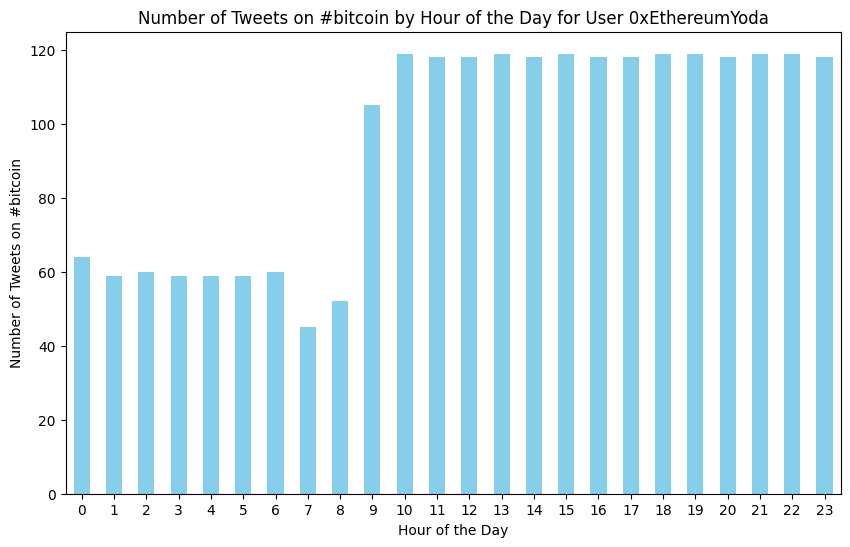

In [ ]:
# Convert 'User Followers' column to numeric
df['User Followers'] = pd.to_numeric(df['User Followers'], errors='coerce')

# Group the data by 'Username' and count the number of tweets made by each user
user_tweet_counts = df.groupby('Username').size()

# Find the username of the user with the highest number of tweets
username_with_highest_tweets = user_tweet_counts.idxmax()

# Filter the dataset for tweets made by that user
user_tweets = df[df['Username'] == username_with_highest_tweets]

# Extract the timestamp from each tweet and convert it to the corresponding hour of the day
user_tweets['Tweet Posted Time'] = pd.to_datetime(user_tweets['Tweet Posted Time'])
user_tweets['Hour'] = user_tweets['Tweet Posted Time'].dt.hour

# Filter the tweets containing the hashtag #bitcoin and remove duplicates
bitcoin_tweets = user_tweets[user_tweets['Tweet Content'].str.contains('#bitcoin')]
bitcoin_tweets_no_duplicates = bitcoin_tweets.drop_duplicates(subset=['Tweet Content'])

# Count the number of tweets made by the user for each hour of the day containing the hashtag #bitcoin
tweets_by_hour = bitcoin_tweets_no_duplicates.groupby('Hour').size()

# Plot the time range (hours of the day) on the x-axis and the number of tweets on the y-axis
plt.figure(figsize=(10, 6))
tweets_by_hour.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets on #bitcoin')
plt.title(f'Number of Tweets on #bitcoin by Hour of the Day for User {username_with_highest_tweets}')
plt.xticks(rotation=0)
plt.show()

#Graph explanation:
#X axis e diffrent hours of the day
# y axis e each hour e total tweets on bitcoin by this user

**Averaging the total count and finding for a day**

<ipython-input-90-79a13fdbc0c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tweets['Tweet Posted Time'] = pd.to_datetime(user_tweets['Tweet Posted Time'])
<ipython-input-90-79a13fdbc0c0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tweets['Hour'] = user_tweets['Tweet Posted Time'].dt.hour


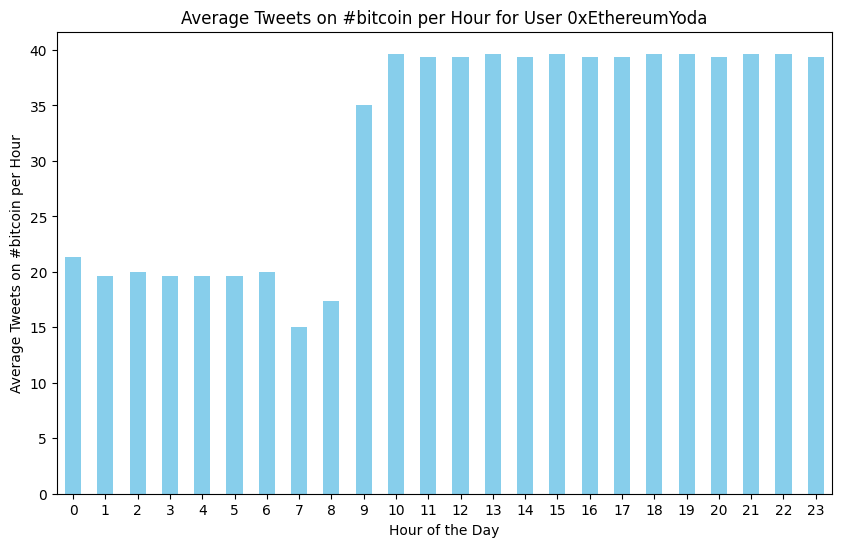

In [ ]:
# Filter the dataset for tweets made by the user with the highest tweet count
user_with_highest_tweets = df['Username'].value_counts().idxmax()
user_tweets = df[df['Username'] == user_with_highest_tweets]

# Extract the timestamp from each tweet and convert it to the corresponding hour of the day
user_tweets['Tweet Posted Time'] = pd.to_datetime(user_tweets['Tweet Posted Time'])
user_tweets['Hour'] = user_tweets['Tweet Posted Time'].dt.hour

# Filter the tweets containing the hashtag #bitcoin and remove duplicates
bitcoin_tweets = user_tweets[user_tweets['Tweet Content'].str.contains('#bitcoin')]
bitcoin_tweets_no_duplicates = bitcoin_tweets.drop_duplicates(subset=['Tweet Content'])

# Group the tweets by hour of the day and count the number of tweets for each hour
tweets_by_hour = bitcoin_tweets_no_duplicates.groupby('Hour').size()

# Calculate the total number of days
total_days = bitcoin_tweets_no_duplicates['Tweet Posted Time'].dt.date.nunique()

# Calculate the average tweets per hour by dividing tweet count by total days
average_tweets_per_hour = tweets_by_hour / total_days

# Plot the time range (hours of the day) on the x-axis and the average number of tweets on the y-axis
plt.figure(figsize=(10, 6))
average_tweets_per_hour.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tweets on #bitcoin per Hour')
plt.title(f'Average Tweets on #bitcoin per Hour for User {user_with_highest_tweets}')
plt.xticks(rotation=0)
plt.show()


<ipython-input-91-06f43f4277b6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tweets['Tweet Posted Time'] = pd.to_datetime(user_tweets['Tweet Posted Time'])
<ipython-input-91-06f43f4277b6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tweets['Hour'] = user_tweets['Tweet Posted Time'].dt.hour


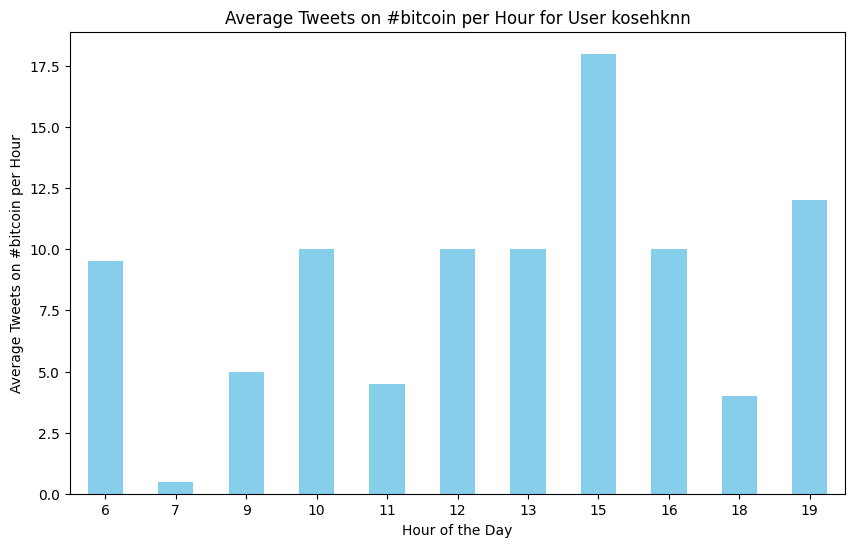

In [ ]:
# Generate a random number between 1 and 100
random_number = random.randint(1, 100)

user_with_second_highest_tweets = df['Username'].value_counts().index[71]

# Filter the dataset for tweets made by the user with the second-highest tweet count
user_tweets = df[df['Username'] == user_with_second_highest_tweets]

# Proceed with the remaining code to analyze the tweets
# Extract the timestamp from each tweet and convert it to the corresponding hour of the day
user_tweets['Tweet Posted Time'] = pd.to_datetime(user_tweets['Tweet Posted Time'])
user_tweets['Hour'] = user_tweets['Tweet Posted Time'].dt.hour

# Filter the tweets containing the hashtag #bitcoin and remove duplicates
bitcoin_tweets = user_tweets[user_tweets['Tweet Content'].str.contains('#bitcoin')]
bitcoin_tweets_no_duplicates = bitcoin_tweets.drop_duplicates(subset=['Tweet Content'])

# Group the tweets by hour of the day and count the number of tweets for each hour
tweets_by_hour = bitcoin_tweets_no_duplicates.groupby('Hour').size()

# Calculate the total number of days
total_days = bitcoin_tweets_no_duplicates['Tweet Posted Time'].dt.date.nunique()

# Calculate the average tweets per hour by dividing tweet count by total days
average_tweets_per_hour = tweets_by_hour / total_days

# Plot the time range (hours of the day) on the x-axis and the average number of tweets on the y-axis
plt.figure(figsize=(10, 6))
average_tweets_per_hour.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tweets on #bitcoin per Hour')
plt.title(f'Average Tweets on #bitcoin per Hour for User {user_with_second_highest_tweets}')
plt.xticks(rotation=0)
plt.show()


<ipython-input-92-15071a9c0a21>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tweets['Tweet Posted Time'] = pd.to_datetime(user_tweets['Tweet Posted Time'])
<ipython-input-92-15071a9c0a21>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tweets['Hour'] = user_tweets['Tweet Posted Time'].dt.hour


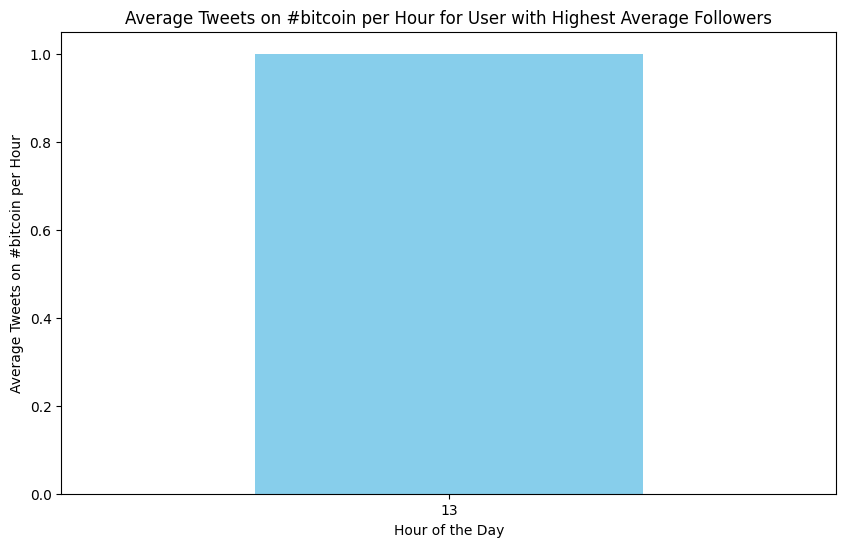

In [ ]:
# Calculate the average follower count for each user
average_follower_count = df.groupby('Username')['User Followers'].mean()

# Select the username with the highest average follower count
user_with_highest_avg_followers = average_follower_count.idxmax()

# Filter the dataset for tweets made by the user with the highest average follower count
user_tweets = df[df['Username'] == user_with_highest_avg_followers]

# Proceed with the remaining code to analyze the tweets
# Extract the timestamp from each tweet and convert it to the corresponding hour of the day
user_tweets['Tweet Posted Time'] = pd.to_datetime(user_tweets['Tweet Posted Time'])
user_tweets['Hour'] = user_tweets['Tweet Posted Time'].dt.hour

# Filter the tweets containing the hashtag #bitcoin and remove duplicates
bitcoin_tweets = user_tweets[user_tweets['Tweet Content'].str.contains('#bitcoin')]
bitcoin_tweets_no_duplicates = bitcoin_tweets.drop_duplicates(subset=['Tweet Content'])

# Group the tweets by hour of the day and count the number of tweets for each hour
tweets_by_hour = bitcoin_tweets_no_duplicates.groupby('Hour').size()

# Calculate the total number of days
total_days = bitcoin_tweets_no_duplicates['Tweet Posted Time'].dt.date.nunique()

# Calculate the average tweets per hour by dividing tweet count by total days
average_tweets_per_hour = tweets_by_hour / total_days

# Plot the time range (hours of the day) on the x-axis and the average number of tweets on the y-axis
plt.figure(figsize=(10, 6))
average_tweets_per_hour.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tweets on #bitcoin per Hour')
plt.title(f'Average Tweets on #bitcoin per Hour for User with Highest Average Followers')
plt.xticks(rotation=0)
plt.show()


# **Tweet count for follower range- including the retweets**

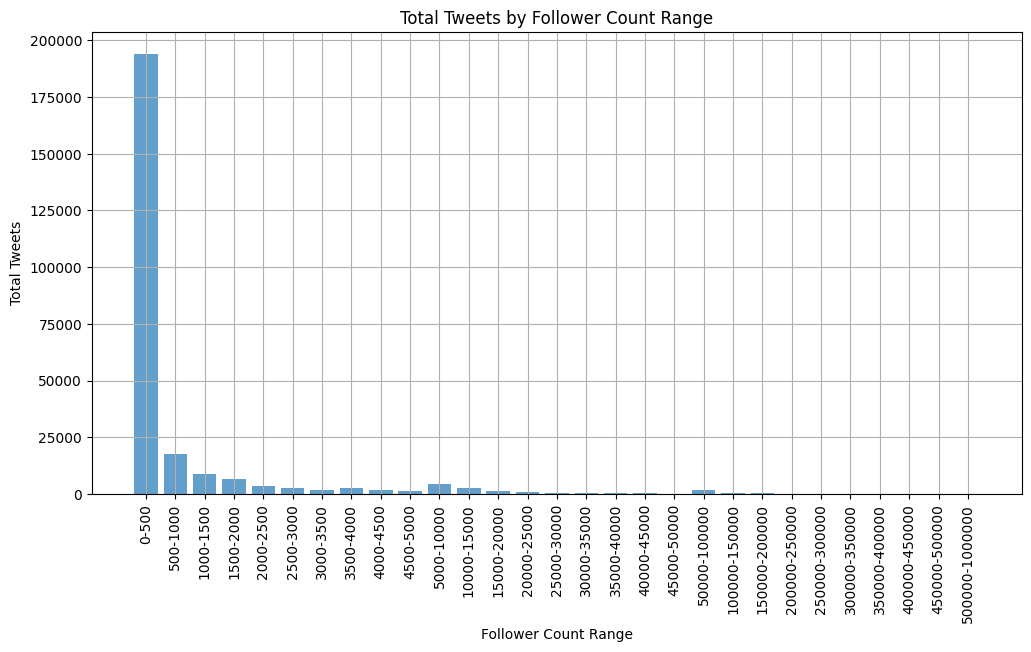

In [ ]:
# Define the ranges for user followers
follower_ranges = [(0, 500), (500, 1000), (1000, 1500), (1500, 2000),
                   (2000, 2500), (2500, 3000), (3000, 3500), (3500, 4000),
                   (4000, 4500), (4500, 5000), (5000, 10000), (10000, 15000),
                   (15000, 20000), (20000, 25000), (25000, 30000), (30000, 35000),
                   (35000, 40000), (40000, 45000), (45000, 50000), (50000, 100000),
                   (100000, 150000), (150000, 200000), (200000, 250000), (250000, 300000),
                   (300000, 350000), (350000, 400000), (400000, 450000), (450000, 500000),
                   (500000, 1000000)]

# Group the data based on follower ranges and calculate total tweet count
tweets_count_by_range = []
for start, end in follower_ranges:
    filtered_df = df[(df['User Followers'] >= start) & (df['User Followers'] < end)]
    total_tweets_count = filtered_df.shape[0]
    tweets_count_by_range.append(total_tweets_count)

# Plot the data on a bar graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(follower_ranges)), tweets_count_by_range, align='center', alpha=0.7)
plt.xticks(range(len(follower_ranges)), [f'{start}-{end}' for start, end in follower_ranges], rotation=90)
plt.xlabel('Follower Count Range')
plt.ylabel('Total Tweets')
plt.title('Total Tweets by Follower Count Range')
plt.grid(True)
plt.show()



In [ ]:
# Define the ranges for user followers
follower_ranges = [(0, 500), (500, 1000), (1000, 1500), (1500, 2000),
                   (2000, 2500), (2500, 3000), (3000, 3500), (3500, 4000),
                   (4000, 4500), (4500, 5000), (5000, 10000), (10000, 15000),
                   (15000, 20000), (20000, 25000), (25000, 30000), (30000, 35000),
                   (35000, 40000), (40000, 45000), (45000, 50000), (50000, 100000),
                   (100000, 150000), (150000, 200000), (200000, 250000), (250000, 300000),
                   (300000, 350000), (350000, 400000), (400000, 450000), (450000, 500000),
                   (500000, 1000000)]

# Group the data based on follower ranges and calculate total tweet count
tweets_count_by_range = []
for start, end in follower_ranges:
    filtered_df = df[(df['User Followers'] >= start) & (df['User Followers'] < end)]
    total_tweets_count = filtered_df.shape[0]
    tweets_count_by_range.append(total_tweets_count)

# Plot the data on a bar graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(follower_ranges)), tweets_count_by_range, align='center', alpha=0.7)
plt.xticks(range(len(follower_ranges)), [f'{start}-{end}' for start, end in follower_ranges], rotation=90)
plt.xlabel('Follower Count Range')
plt.ylabel('Total Tweets')
plt.yscale('log')  # Convert y-axis to logarithmic scale
plt.title('Total Tweets by Follower Count Range')
plt.grid(True)
plt.show()

# **Bitcoin Tweet count for follower range- including the retweets**

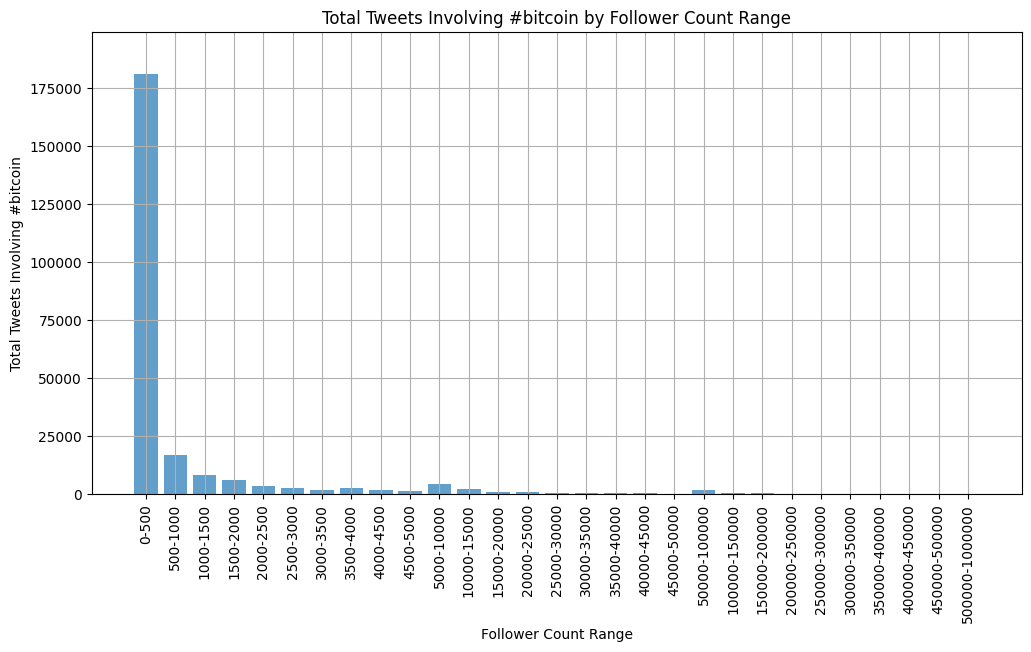

In [ ]:
# Filter the DataFrame to include only tweets containing #bitcoin
bitcoin_tweets = df[df['Tweet Content'].str.contains('#bitcoin', case=False)]

# Define the ranges for user followers
follower_ranges = [(0, 500), (500, 1000), (1000, 1500), (1500, 2000),
                   (2000, 2500), (2500, 3000), (3000, 3500), (3500, 4000),
                   (4000, 4500), (4500, 5000), (5000, 10000), (10000, 15000),
                   (15000, 20000), (20000, 25000), (25000, 30000), (30000, 35000),
                   (35000, 40000), (40000, 45000), (45000, 50000), (50000, 100000),
                   (100000, 150000), (150000, 200000), (200000, 250000), (250000, 300000),
                   (300000, 350000), (350000, 400000), (400000, 450000), (450000, 500000),
                   (500000, 1000000)]

# Group the data based on follower ranges and calculate total tweet count involving #bitcoin
bitcoin_tweets_count_by_range = []
for start, end in follower_ranges:
    filtered_df = bitcoin_tweets[(bitcoin_tweets['User Followers'] >= start) & (bitcoin_tweets['User Followers'] < end)]
    total_bitcoin_tweets_count = filtered_df.shape[0]
    bitcoin_tweets_count_by_range.append(total_bitcoin_tweets_count)

# Plot the data on a bar graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(follower_ranges)), bitcoin_tweets_count_by_range, align='center', alpha=0.7)
plt.xticks(range(len(follower_ranges)), [f'{start}-{end}' for start, end in follower_ranges], rotation=90)
plt.xlabel('Follower Count Range')
plt.ylabel('Total Tweets Involving #bitcoin')
plt.title('Total Tweets Involving #bitcoin by Follower Count Range')

# Set the y-axis limits based on the maximum tweet count
plt.ylim(0, max(bitcoin_tweets_count_by_range) * 1.1)

plt.grid(True)
plt.show()


# **Representation in Table with values**

In [ ]:
# Define the ranges for user followers
follower_ranges = [(0, 500), (500, 1000), (1000, 1500), (1500, 2000),
                   (2000, 2500), (2500, 3000), (3000, 3500), (3500, 4000),
                   (4000, 4500), (4500, 5000), (5000, 10000), (10000, 15000),
                   (15000, 20000), (20000, 25000), (25000, 30000), (30000, 35000),
                   (35000, 40000), (40000, 45000), (45000, 50000), (50000, 100000),
                   (100000, 150000), (150000, 200000), (200000, 250000), (250000, 300000),
                   (300000, 350000), (350000, 400000), (400000, 450000), (450000, 500000),
                   (500000, 1000000)]

# Create a DataFrame to store follower ranges and corresponding Bitcoin tweets
bitcoin_tweets_table = pd.DataFrame(columns=['Follower Range', 'Bitcoin Tweets'])

# Create a PrettyTable object
table = PrettyTable()

# Define the field names
table.field_names = ["Follower Range", "Bitcoin Tweets"]

# Add rows to the table
for start, end in follower_ranges:
    filtered_df = bitcoin_tweets[(bitcoin_tweets['User Followers'] >= start) & (bitcoin_tweets['User Followers'] < end)]
    total_bitcoin_tweets_count = filtered_df.shape[0]
    table.add_row([f'{start}-{end}', total_bitcoin_tweets_count])

# Print the table
print(table)


+----------------+----------------+
| Follower Range | Bitcoin Tweets |
+----------------+----------------+
|     0-500      |     180930     |
|    500-1000    |     16667      |
|   1000-1500    |      8129      |
|   1500-2000    |      6068      |
|   2000-2500    |      3428      |
|   2500-3000    |      2422      |
|   3000-3500    |      1578      |
|   3500-4000    |      2757      |
|   4000-4500    |      1530      |
|   4500-5000    |      1163      |
|   5000-10000   |      4144      |
|  10000-15000   |      2298      |
|  15000-20000   |      1042      |
|  20000-25000   |      741       |
|  25000-30000   |      414       |
|  30000-35000   |      277       |
|  35000-40000   |      311       |
|  40000-45000   |      241       |
|  45000-50000   |      141       |
|  50000-100000  |      1658      |
| 100000-150000  |      274       |
| 150000-200000  |      215       |
| 200000-250000  |       97       |
| 250000-300000  |       48       |
| 300000-350000  |       65 

# **Tweet count for follower range- neglacting the retweets**

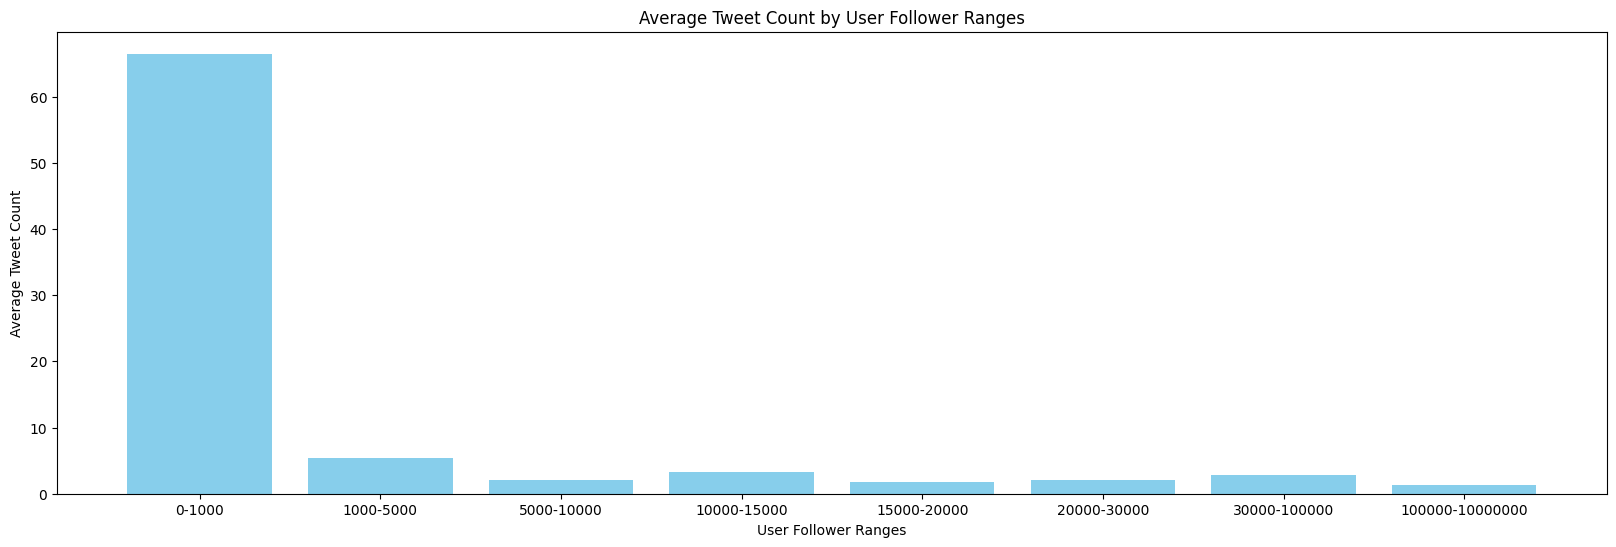

In [ ]:
# Clean 'User Followers' column to remove non-numeric characters and convert to numeric
df_nodup['User Followers'] = pd.to_numeric(df_nodup['User Followers'].replace(',', ''), errors='coerce')

# Drop duplicates/retweets
df_nodup = df.drop_duplicates(subset=['Tweet Content'])

# Define the user follower ranges
follower_ranges = [(0,1000), (1000, 5000), (5000, 10000), (10000, 15000), (15000, 20000), (20000,30000),(30000,100000), (100000,10000000)]

# Initialize lists to store tweet counts and average tweet counts for each range
tweet_counts = []
avg_tweet_counts = []

# Iterate over each follower range
for follower_range in follower_ranges:
    # Filter DataFrame for user follower range
    filtered_df = df_nodup[(df_nodup['User Followers'] >= follower_range[0]) & (df_nodup['User Followers'] < follower_range[1])]

    # Count total tweets
    total_tweets = len(filtered_df)
    tweet_counts.append(total_tweets)

    # Calculate average tweet count
    unique_followers = filtered_df['User Followers'].dropna().unique()
    if len(unique_followers) > 0:
        avg_tweet_count = total_tweets / len(unique_followers)
        avg_tweet_counts.append(avg_tweet_count)
    else:
        avg_tweet_counts.append(0)  # Set average tweet count to 0 if no unique followers in range

# Plot the bar chart
plt.figure(figsize=(20, 6))
plt.bar(np.arange(len(follower_ranges)), avg_tweet_counts, color='skyblue')

# Add labels and title
plt.xlabel('User Follower Ranges')
plt.ylabel('Average Tweet Count')
plt.title('Average Tweet Count by User Follower Ranges')
plt.xticks(np.arange(len(follower_ranges)), [f'{range[0]}-{range[1]}' for range in follower_ranges])

# Show the plot
plt.show()


# **Top n hashtag- frequency/ tweet count VS hours of the day**

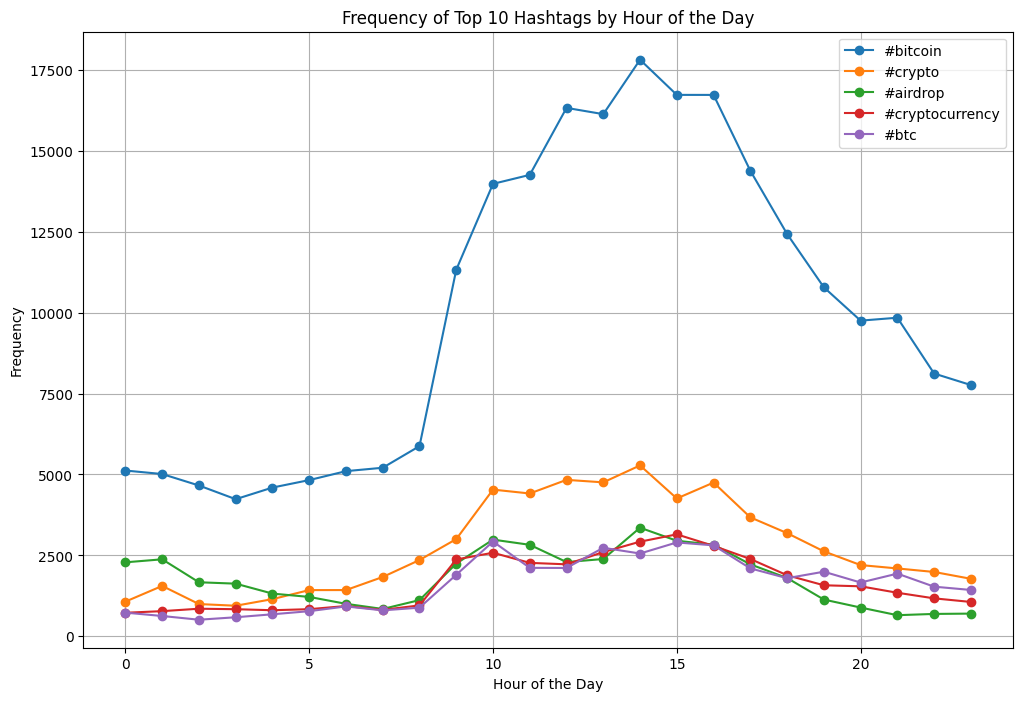

In [ ]:
# Extract the hashtags from the 'Tweet Content' column
df['Hashtags'] = df['Tweet Content'].str.findall(r'#\w+')

# Extract the timestamp from each tweet and convert it to the corresponding hour of the day
df['Hour'] = pd.to_datetime(df['Tweet Posted Time']).dt.hour

# Explode the hashtags to create a new row for each hashtag
hashtags_df = df['Hashtags'].explode().reset_index(drop=True)

# Count the occurrences of each hashtag
hashtag_counts = hashtags_df.value_counts()

# Select the top 10 hashtags
top_10_hashtags = hashtag_counts.head(5).index.tolist()

# Filter the DataFrame to include only tweets containing the top 10 hashtags
filtered_df = df[df['Hashtags'].apply(lambda x: any(hashtag in top_10_hashtags for hashtag in x))]

# Explode the hashtags again to create separate rows for each hashtag
exploded_df = filtered_df.explode('Hashtags')

# Group by hashtag and hour and count occurrences
grouped_df = exploded_df.groupby(['Hashtags', 'Hour']).size().reset_index(name='Frequency')

# Plot the graph
plt.figure(figsize=(12, 8))

# Iterate over each hashtag
for hashtag in top_10_hashtags:
    # Filter data for the current hashtag
    hashtag_data = grouped_df[grouped_df['Hashtags'] == hashtag]
    # Plot the data points
    plt.plot(hashtag_data['Hour'], hashtag_data['Frequency'], marker='o', label=hashtag)

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Frequency of Top 10 Hashtags by Hour of the Day')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [ ]:
#NOTES FROM MEETING
#bitcoin kotha bolar poriman follower count er sathe proportional kina
#1 jon er
#koto freuently alap ta dey #
#timezone- utc/... in graph-
#user range -tweets ar retweets
#Location, night day time zone, (- follower 0-1k, )
#s:
#1. 1 follower - hashtag -
#2. 1 hashtag- 1 person av how much time on a hashtag-Done
#which hashtag which time-  b